# Ejercicios

Utilizando el DataFrame que usamos para los ejercicios de la clase invertida de ayer, contestad a las siguientes preguntas: 



1. La variable `price` representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

2. Crea una tabla de correlación que muestre cómo se relacionan las variables `price`, `retail_price`, `units_sold`, `rating_sold`, y `rating_count`. Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

3. Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas `uses_ad_boosts` y `badge_product_quality`. ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.

4. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `badge_fast_shipping`. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.

5. Calcula la media y la mediana de la variable `mean_product_prices`. ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

6. Realiza un análisis de correlación entre `total_units_sold` y `mean_product_ratings_count`. ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.

7. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `seller_reputation`. ¿Cómo se relacionan las calificaciones de los empleados con la reputación del vendedor? Proporciona interpretaciones basadas en la tabla de contingencia.

8. Calcula la media y la mediana de la variable `discount_percentage`. ¿Qué puedes decir sobre los descuentos promedio en los productos? ¿Hay valores atípicos en esta variable?

9. Utiliza una tabla de contingencia para analizar cómo se relacionan las variables categóricas `badge_fast_shipping` y `seller_reputation`. ¿Qué puedes concluir sobre la distribución de las calificaciones altas? 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
pd.set_option('display.max_columns', None) 

1. La variable `price` representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

In [17]:
df = pd.read_csv('df-rating-insight-leccion-06.csv', index_col=  0)
df.head(1)

,merchant_id,listed_products,total_units_sold,mean_units_sold_per_product,rating,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,index_r,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating_r,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id.1,product_url,product_id,discount_percentage,seller_reputation
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5357bcf2bb72c5504882e889,2,120000,60000.0,4.219,320031.0,9.0,20.0,8836.0,1018,Femmes dentelle manches courtes hauts hauts ch...,Women Lace Short Sleeve Long Tops Blouse Shirt...,7.0,22,100000,Si,3.82,11913,5355.0,2430.0,1974.0,960.0,1194.0,No,Buena,No,"blouse,Fashion,Shirt,boho,Tops,summer t-shirts...",black,S,Livraison standard,2,No,46,50,CN,primesalecolimited,90 % avis positifs,320031,5357bcf2bb72c5504882e889,https://www.wish.com/c/567cb0925ff12c4829f07dfb,567cb0925ff12c4829f07dfb,68.18,Buena


In [123]:
media_precios = df['price'].mean()
mediana_precios = df['price'].median()
print( f'La media de los precios es : {np.round(media_precios, 2)}')
print( f'La mediana de los precios es : {np.round(mediana_precios, 2)}')

La media de los precios es : 8.33
La mediana de los precios es : 8.0


2. Crea una tabla de correlación que muestre cómo se relacionan las variables `price`, `retail_price`, `units_sold`, `rating_sold`, y `rating_count`. Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

NOTA: No tengo columna 'rating_sold' en el DF

In [30]:
variables = ['price', 'retail_price', 'units_sold', 'rating_count']
for var in variables:
    stat, p = shapiro(df[var])
    print(f'Normalidad de {var}: Estadístico={stat:.3f}, p-valor={p:.3f}')

    # Interpretación de los resultados
    if p > 0.05:
        print(f"{var} parece tener una distribución normal (no rechaza H0)")
    else:
        print(f"{var} no parece tener una distribución normal (rechaza H0)")

Normalidad de price: Estadístico=0.932, p-valor=0.000
price no parece tener una distribución normal (rechaza H0)
Normalidad de retail_price: Estadístico=0.650, p-valor=0.000
retail_price no parece tener una distribución normal (rechaza H0)
Normalidad de units_sold: Estadístico=0.461, p-valor=0.000
units_sold no parece tener una distribución normal (rechaza H0)
Normalidad de rating_count: Estadístico=0.470, p-valor=0.000
rating_count no parece tener una distribución normal (rechaza H0)


 NOTA: Ninguna de las variables sigue una distribución normal, debo usar un método de correlación no paramétrico para analizar las relaciones entre estas variables. En este caso el método 'spearman'.

In [32]:
df_correlacion = df[['price', 'retail_price', 'units_sold', 'rating_count']].corr(method='spearman') 
df_correlacion

,price,retail_price,units_sold,rating_count
price,1.000000,0.536104,0.061769,0.129345
retail_price,0.536104,1.000000,-0.027991,0.024439
units_sold,0.061769,-0.027991,1.000000,0.941988
rating_count,0.129345,0.024439,0.941988,1.000000


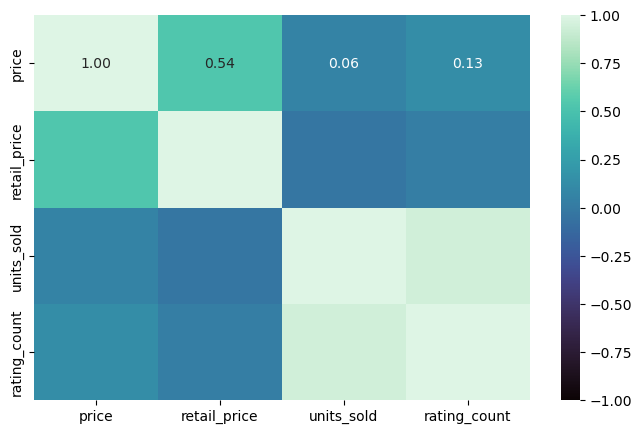

In [42]:
plt.figure(figsize = (8, 5))

sns.heatmap(df_correlacion, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1);

#### Conclusión:
Columnas con correlación: 
- 'retail_price' y 'price' (correlación alta): Indica una relación positiva entre las columnas. Es posible que los productos que tienen un precio más alto también tengan un precio de venta al público más elevado.
- 'rating_count' y 'price': Correlación es baja pero positiva. Puede indicar que los productos con precios más altos reciben ligeramente más calificaciones, posiblemente debido a expectativas más altas de los consumidores o una mayor disposición a revisar tras una inversión grande.

3. Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas `uses_ad_boosts` y `badge_product_quality`. ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.

In [44]:
tabla_contingencia = pd.crosstab(df['uses_ad_boosts'], df['badge_product_quality'], normalize=True) * 100
tabla_contingencia.T

uses_ad_boosts,No,Si
badge_product_quality,,
Buena,52.511125,40.050858
Excelente,4.195804,3.242212


##### Interpretación: 
- Los anuncios promocionales parecen tener un efecto  negativo en los productos de excelente calidad en comparación con los de buena calidad, podría indicar que los consumidores confían más en la reputación de la calidad del producto que en la publicidad.

4. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `badge_fast_shipping`. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.


In [71]:
tabla_contingencia_2 = pd.crosstab(df['badge_local_product'], df['badge_fast_shipping'], normalize=True) * 100
tabla_contingencia_2

badge_fast_shipping,No,Si
badge_local_product,,
No,97.457088,0.699301
Si,1.271456,0.572155


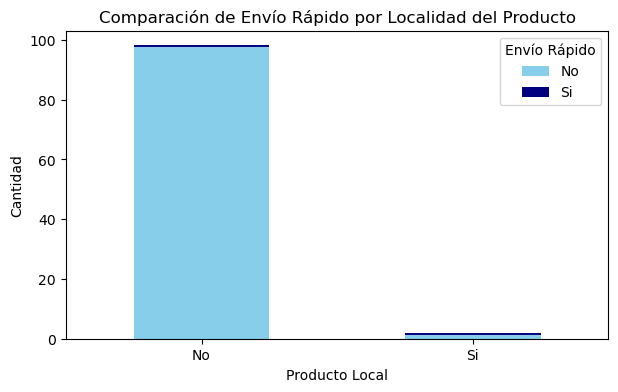

In [86]:
tabla_contingencia_2.plot(kind='bar', 
                          stacked=True,  # Uno encima del otro
                          color=['skyblue', 'navy'], 
                          figsize=(7, 4))
plt.title('Comparación de Envío Rápido por Localidad del Producto')
plt.xlabel('Producto Local')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Mantiene los nombres de las categorías horizontales
plt.legend(title='Envío Rápido');

#### Interpretacion:
- La gran mayoría de los productos que no son locales no tienen envío rápido
- La proporción de productos locales con envío rápido es relativamente más alta que en los no locales

5. Calcula la media y la mediana de la variable `mean_product_prices`. ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

In [93]:
media_precios_promedio = df['mean_product_prices'].mean()
mediana_mean_precios_promedio = df['mean_product_prices'].median()

print( f'La media de los precios productos es : {np.round(media_precios_promedio, 2)}')
print( f'La mediana de los precios productos es : {np.round(mediana_mean_precios_promedio, 2)}')

La media de los precios productos es : 8.33
La mediana de los precios productos es : 8.0


#### Interpretacion:
- En una distribución perfectamente simétrica, la media y la mediana serían iguales.
- No hay un número desproporcionado de valores atípicos que estén distorsionando el promedio.

6. Realiza un análisis de correlación entre `total_units_sold` y `mean_product_ratings_count`. ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.

In [94]:
variable_tm = ['total_units_sold','mean_product_ratings_count' ]
for var in variables:
    stat, p = shapiro(df[var])
    print(f'Normalidad de {var}: Estadístico={stat:.3f}, p-valor={p:.3f}')

    # Interpretación de los resultados
    if p > 0.05:
        print(f"{var} parece tener una distribución normal (no rechaza H0)")
    else:
        print(f"{var} no parece tener una distribución normal (rechaza H0)")

Normalidad de price: Estadístico=0.932, p-valor=0.000
price no parece tener una distribución normal (rechaza H0)
Normalidad de retail_price: Estadístico=0.650, p-valor=0.000
retail_price no parece tener una distribución normal (rechaza H0)
Normalidad de units_sold: Estadístico=0.461, p-valor=0.000
units_sold no parece tener una distribución normal (rechaza H0)
Normalidad de rating_count: Estadístico=0.470, p-valor=0.000
rating_count no parece tener una distribución normal (rechaza H0)


 Ninguna de las variables sigue una distribución normal, debo usar un método de correlación no paramétrico para analizar las relaciones entre estas variables. En este caso el método 'spearman'.

In [95]:
df_corr_tm = df[['total_units_sold','mean_product_ratings_count']].corr(method='spearman') 
df_corr_tm 

,total_units_sold,mean_product_ratings_count
total_units_sold,1.000000,0.875353
mean_product_ratings_count,0.875353,1.000000


#### Interpretacion:
- Fuerte Relación Positiva: 
correlación de Spearman de 0.87 indica una relación positiva fuerte entre el total de unidades vendidas y el conteo promedio de calificaciones de los productos


7. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `seller_reputation`. ¿Cómo se relacionan las calificaciones de los empleados con la reputación del vendedor? Proporciona interpretaciones basadas en la tabla de contingencia.


In [96]:
tabla_contingencia_bs = pd.crosstab(df['badge_local_product'], df['seller_reputation'], normalize=True) * 100
tabla_contingencia_bs 

seller_reputation,Buena,Regular
badge_local_product,,
No,57.469803,40.686586
Si,1.716465,0.127146


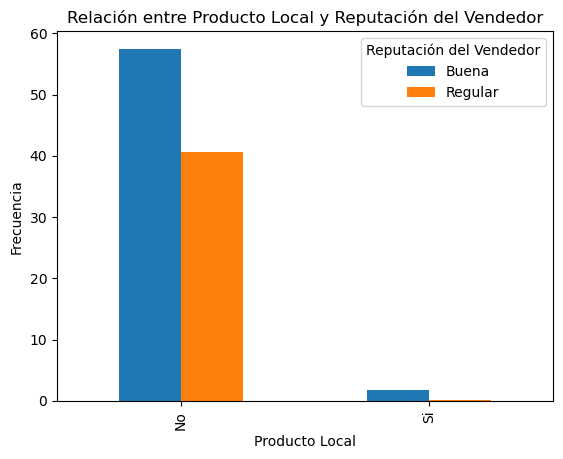

In [122]:
tabla_contingencia_bs.plot(kind='bar', 
                           )
plt.title('Relación entre Producto Local y Reputación del Vendedor')
plt.xlabel('Producto Local')
plt.ylabel('Frecuencia')
plt.legend(title='Reputación del Vendedor')

#### Interpretación:
- Dominancia de Productos No Locales: El volumen de productos no locales es mucho mayor en comparación con los locales, tanto en las categorías de buena como regular reputación. 
- Alta Calidad de Productos Locales: Los productos locales tienden a tener una reputación predominantemente buena.


In [112]:
sns.color_palette('crest')

[(0.48942421, 0.72854938, 0.56751036),
 (0.34892097, 0.64828676, 0.56513633),
 (0.24929311, 0.56486397, 0.5586654),
 (0.15615526, 0.47913212, 0.54850526),
 (0.11131735, 0.39155635, 0.53422678),
 (0.14573579, 0.29354139, 0.49847009)]

8. Calcula la media y la mediana de la variable `discount_percentage`. ¿Qué puedes decir sobre los descuentos promedio en los productos? ¿Hay valores atípicos en esta variable?

In [136]:
media_discount = df['discount_percentage'].mean()
mediana_discount = df['discount_percentage'].median()
print( f'La media de los porcentajes promedio de descuento es : {np.round(media_discount, 2)}')
print( f'La mediana de los porcentajes promedio de descuento es : {np.round(mediana_discount, 2)}')

La media de los porcentajes promedio de descuento es : 26.06
La mediana de los porcentajes promedio de descuento es : 5.83


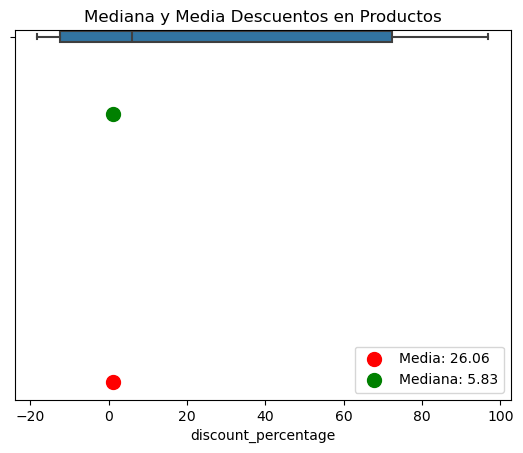

In [140]:
sns.boxplot(x=df['discount_percentage'])
plt.title('Mediana y Media Descuentos en Productos')
plt.scatter(1, media_discount, color='red', s=100, label=f'Media: {media_discount:.2f}')
plt.scatter(1, mediana_discount, color='green', s=100, label=f'Mediana: {mediana_discount:.2f}')
plt.legend();

#### Interpretacion:
- Existe una diferencia significativa entre la media y la mediana, lo que prueba la existencia de valores atípicos.
- Hay una alta dispersión en los descuentos ofrecidos.

9. Utiliza una tabla de contingencia para analizar cómo se relacionan las variables categóricas `badge_fast_shipping` y `seller_reputation`. ¿Qué puedes concluir sobre la distribución de las calificaciones altas? 

In [141]:
tabla_shipp_seller = pd.crosstab(index=df['badge_fast_shipping'],columns=df['seller_reputation'],margins=True,margins_name="Total") # margins=True incluye totales
tabla_shipp_seller

seller_reputation,Buena,Regular,Total
badge_fast_shipping,,,
No,915,638,1553
Si,16,4,20
Total,931,642,1573


#### Interpretacion:

- Solo 20 vendedores de un total de 1573 ofrecen envío rápido. Esto indica que el envío rápido es una característica poco común entre los vendedores en esta muestra.
- Entre los vendedores que ofrecen envío rápido, la mayoría tienen una reputación buena.
- Los vendedores con envío rápido son pocos, pero una proporción  mayor de estos tiene buena reputación en comparación con los que no ofrecen envío rápido. 